In [2]:
#Ejemplo con el dataset iris
import numpy as np
from sklearn import svm, datasets

# Cargamos los datos
iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [16]:
#Dividir para poder entrenar y hacer split
X_train=X[:140]
y_train=y[:140]
X_test=X[140:]
y_test=y[140:]

In [17]:
#Creamos la instancia de nuestro algoritmo
C = 1.0  # parametro para mejorar el aprendizaje
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

In [18]:
lin_svc.predict(X_test) #Aquí vamos a imprimir lo que predice el algoritmo

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1]:
y_test
#siempre predecimos la misma clase :(

NameError: name 'y_test' is not defined

In [21]:
from sklearn import cross_validation
#Mezclamos todo, para poder tener diferentes clases
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
C = 1.0  # volvemos a regularizar y entrenar
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

In [23]:
lin_svc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0])

In [24]:
y_test
#Ahora sí, predecimos cosas distintas

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0])

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [28]:
clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0])

In [118]:
import matplotlib.pyplot as plt

#Ahora sí predecimos los dígitos

digits=datasets.load_digits()
#plt.matshow(digits.images[12])
#plt.show() 
digits.target[12]
y=digits.target
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
print(X.shape)
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=42)
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=10).fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print(len(X_test))
print(accuracy_score(y_test, lin_svc.predict(X_test)))
from sklearn.externals import joblib
joblib.dump(lin_svc, 'svmmnist.pkl') #Recordemos guardar el modelo :D

(1797, 64)
180
0.95


['svmmnist.pkl']

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[6]


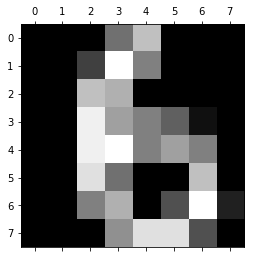

In [120]:
#Ésto es lo chido, cargar la información del clasificador
from sklearn.externals import joblib
ssvm=joblib.load('svmmnist.pkl') 
print(ssvm.predict(X_test[0]))
plt.matshow(X_test[0].reshape((8, 8)))
plt.show()

In [105]:
#Algoritmo de Bag of Words
import numpy as np
class BoW():
    def __init__(self,text):
        self.text=text
    def make_bag(self):
        words=list(set(self.text.split(" ")))
        self.vectorizer={}
        self.len=len(words)
        for pair in enumerate(words):
            self.vectorizer[pair[1]]=pair[0]
        return self.vectorizer
    def give_vector(self,text):
        vector=np.zeros(self.len)
        for word in text.split(" "):
            if word in vectorizer.keys():
                vector[self.vectorizer[word]]+=1
        return vector

In [81]:
bow=BoW("Anita lava la tina")
print(bow.make_bag())

{'lava': 0, 'Anita': 1, 'la': 2, 'tina': 3}


In [82]:
bow.give_vector("la tina")

array([ 0.,  0.,  1.,  1.])

5


True